In [1]:
import Setup
from Setup import category_colors_labels, model_type_list, segment_names, scenario_order_risk, category_colors_labels_full
import AppSetup_Optimized as AppSetup
import Funnel_Plots as FPlots
import Combo_HeatMaps as CPlots
import Portfolio_Composition_Plots as PCPlots
from Portfolio_Composition_Plots import combos
import Venn_Plots as VPlots

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df_full = Setup.df_large
df = df_full.sample(10000)

In [4]:
segment_df, full_combo_df, pairwise_df = PCPlots.combo_data_prep(df, df["Names"].values,
                                                                 model_type_list, scenario_order_risk, segment_names)

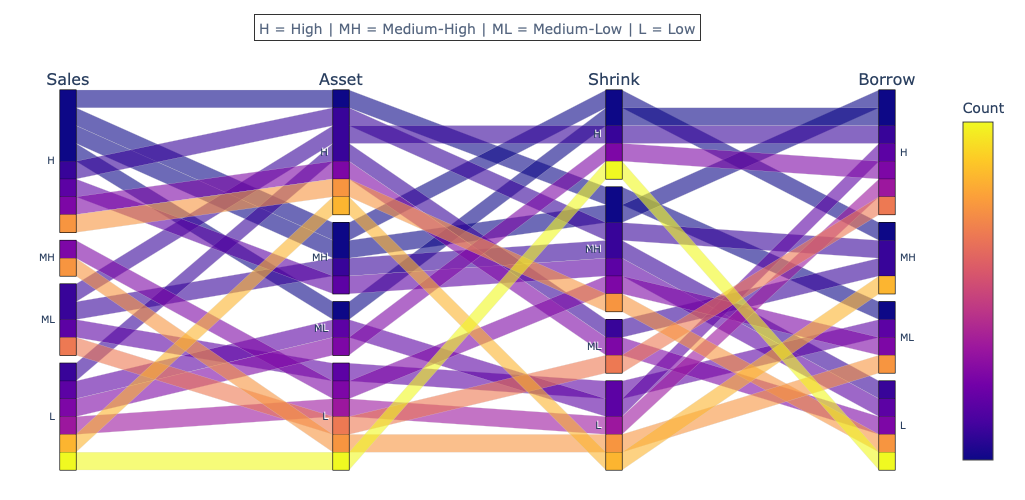

In [4]:
CPlots.parallel_category_plot(full_combo_df, 20)

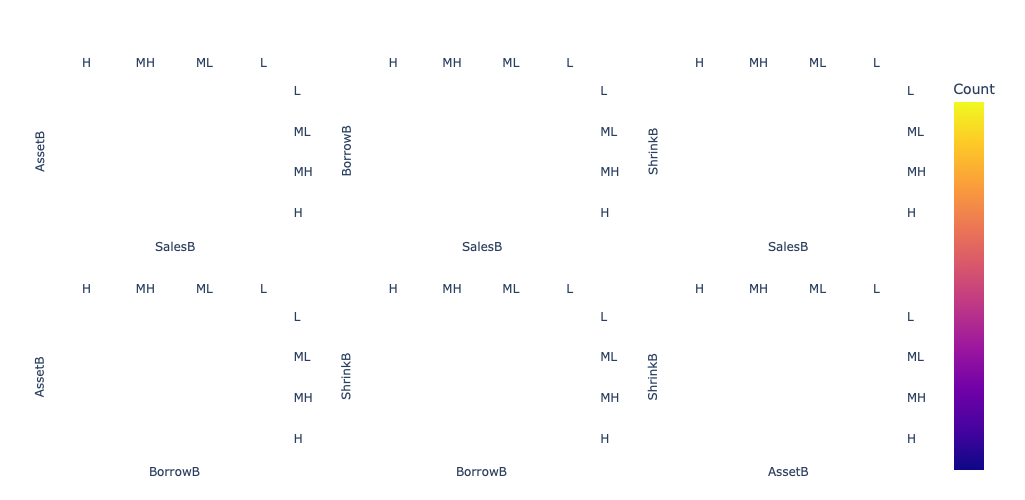

In [5]:
CPlots.pairwise_combo_grid(pairwise_df, combos)

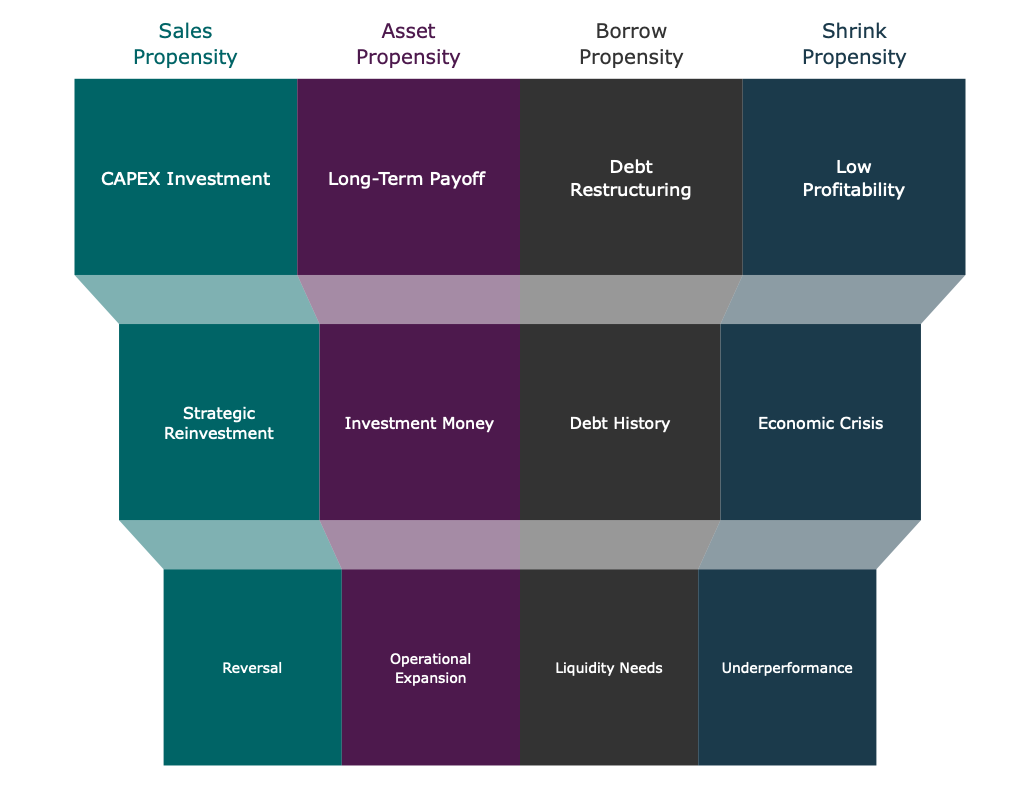

In [7]:
FPlots.funnel_plot(Setup.df_large, model_type_list, 3)

In [19]:
segment_df.head(3)

SalesB AssetB     ews ews_s0  ews_bl  ews_s1  Names          Label
2212   Medium-Low   High     Red    Red  Orange   Green     12  Critical Risk
2060   Medium-Low   High   Green  Green  Yellow   Green      9  Elevated Risk
1131  Medium-High   High  Orange    Red     Red  Yellow      9     Vulnerable

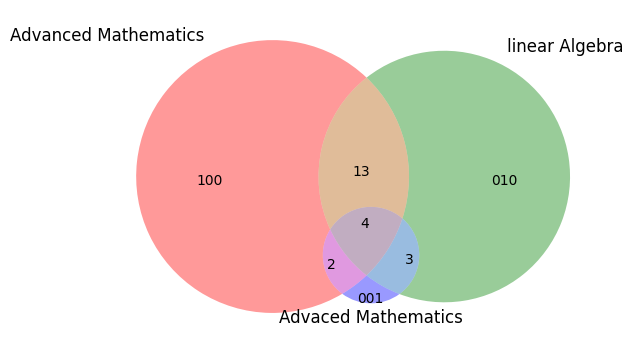

In [37]:
subsets = (61, 48, 13,1,2,3,4)  # `subsets` is used in the next code box
diagram = venn3(
    subsets = subsets, 
    set_labels = ('Advanced Mathematics', 'linear Algebra','Advaced Mathematics', 'linear lgebra','Advanced Mathematis', 'linar Algebra'),
)

# display the label IDs themselves as subgroup labels
for id in ('100','010','001'):
    diagram.get_label_by_id(id).set_text(id)

plt.show()

In [59]:
from matplotlib_venn import venn3, venn2
import matplotlib.pyplot as plt
def venn3_segment(labels, values, colors_dict, background_color = "white"):

    # Define subset sizes
    subset_sizes = [1, 1, 0.3, 1, 0.3, 0.3, 0.15]  # Specify the subset sizes

    # Create the Venn diagram
    venn = venn3(subsets=subset_sizes, set_labels = labels)

    # Set custom colors for each circle
    venn.get_patch_by_id('100').set_color(colors_dict[values[0]])  # Set color for Set A (left circle)
    venn.get_patch_by_id('010').set_color(colors_dict[values[1]])  # Set color for Set B (right circle)
    venn.get_patch_by_id('001').set_color(colors_dict[values[2]])  # Set color for Set C (top circle)

    # Hide all the labels (numbers inside the Venn diagram)
    for label in venn.set_labels:  # Set labels for the sets (A, B, C)
        label.set_fontsize(16)  # Adjust font size if desired

    for label in venn.subset_labels:  # Hide the subset values
        if label:  # Make sure the label exists
            label.set_text('')  # Remove the text by setting it to an empty string

    values = [i.replace("-","\n").replace(" ", "\n") for i in values]
    
    # Set custom labels inside each circle
    venn.get_label_by_id('100').set_text(values[0])
    venn.get_label_by_id('010').set_text(values[1])
    venn.get_label_by_id('001').set_text(values[2])
    venn.get_label_by_id('100').set_fontsize(12)
    venn.get_label_by_id('010').set_fontsize(12)
    venn.get_label_by_id('001').set_fontsize(12)

    # Set the background color of the figure
    fig = plt.gcf()  # Get the current figure
    fig.patch.set_facecolor(background_color)  # Set the background color


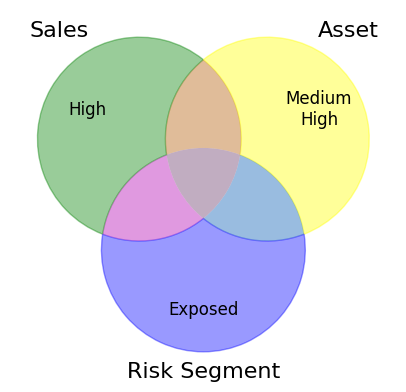

In [61]:
venn3_segment(["Sales","Asset", "Risk Segment"], 
              segment_df[["SalesB","AssetB", "Label"]].iloc[0].values,
              {**category_colors_labels_full,segment_df["Label"].iloc[0]:"Blue"})

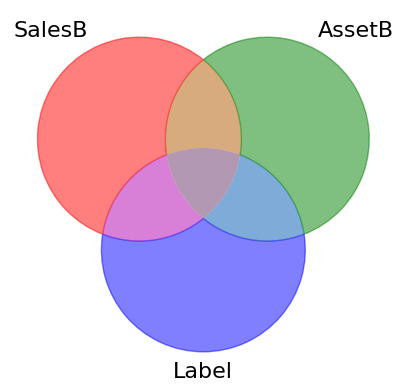

In [18]:
venn3_plot(segment_df[["SalesB", "AssetB", "Label"]], color_dict, "white")

In [17]:

def venn3_plot(labels, colors, background_color):
    
    # Define subset sizes
    subset_sizes = [1, 1, 0.3, 1, 0.3, 0.3, 0.15]  # Specify the subset sizes

    # Create the Venn diagram
    venn = venn3(subsets=subset_sizes, set_labels = labels,alpha = 0.5)

    # Set custom colors for each circle
    venn.get_patch_by_id('100').set_color(colors[0])  # Set color for Set A (left circle)
    venn.get_patch_by_id('010').set_color(colors[1])  # Set color for Set B (right circle)
    venn.get_patch_by_id('001').set_color(colors[2])  # Set color for Set C (top circle)


    # Hide all the labels (numbers inside the Venn diagram)
    for label in venn.set_labels:  # Set labels for the sets (A, B, C)
        label.set_fontsize(16)  # Adjust font size if desired

    for label in venn.subset_labels:  # Hide the subset values
        if label:  # Make sure the label exists
            label.set_text('')  # Remove the text by setting it to an empty string

    # Set the background color of the figure
    fig = plt.gcf()  # Get the current figure
    fig.patch.set_facecolor(background_color)  # Set the background color

    # Extract the middle patch (where A, B, and C overlap)
    middle_patch = venn.get_patch_by_id('111')

    # Get the face color of the middle patch
    middle_color_rgba = middle_patch.get_facecolor()
    middle_color = f"rgba({int(middle_color_rgba[0] * 255)}, {int(middle_color_rgba[1] * 255)}, {int(middle_color_rgba[2] * 255)}, {middle_color_rgba[3]})"

    plt.show()

In [109]:
def Venn_CommonSegments(df, model_type_list, ordered_scenarios, segment_names):

    for i in model_type_list:
        conditions = [
            (df[i+'P'] >= 75),
            (df[i+'P'] >= 50),
            (df[i+'P'] >= 25)]
        
        choices = ['High', 'Medium-High', 'Medium-Low']
        df[i] = np.select(conditions, choices, default='Low')
        df[i] = pd.Categorical(df[i], ordered = True, categories = ['High', 'Medium-High', 'Medium-Low', 'Low'])
        df.drop(columns = [i+"P"], inplace = True)

    out = df.groupby(model_type_list+["ews" + (f"_{i}" if i else "") for i in scenario_order_risk])["Names"].count().reset_index().sort_values("Names", ascending = False)
    out["Label"] = out[["ews" + (f"_{i}" if i else "") for i in scenario_order_risk]].apply(lambda row: segment_names[";".join(row)], axis = 1)
    
    return out

In [110]:
df = df_full.sample(10000)
Venn_CommonSegments(df, ["Sales", "Borrow"], scenario_order_risk, segment_names).head()

Sales      Borrow     ews  ews_s0  ews_bl  ews_s1  Names  \
2264   Medium-Low        High  Yellow  Orange     Red   Green      9   
1022         High         Low  Yellow  Yellow  Yellow     Red      9   
217          High        High  Yellow  Orange     Red  Orange      9   
537          High  Medium-Low   Green  Orange     Red  Orange      9   
1900  Medium-High         Low  Orange     Red  Yellow   Green      9   

                Label  
2264  Ultra-Resilient  
1022        Sensitive  
217         Resilient  
537           Fragile  
1900  Ultra-Resilient

In [66]:
df[["ews" + (f"_{i}" if i else "") for i in scenario_order_risk]].apply(lambda row: segment_names[";".join(row)], axis = 1)

92390     Ultra-Resilient
113638         Vulnerable
243794          Resurgent
4059       Very Resileint
24525           Resilient
               ...       
126382     Very Resileint
424294            Exposed
120682      Elevated Risk
71505          Distressed
186124          Resurgent
Length: 10000, dtype: object

In [ ]:
df['Scenario'] = pd.Categorical(df['Scenario'],
                                    categories = ["ews" + (f"_{i}" if i else "") for i in order_scenario], 
                                    ordered=True)

{'Green;Green;Green;Green': 'Ultra-Resilient',
 'Green;Green;Green;Yellow': 'Very Resileint',
 'Green;Green;Green;Orange': 'Resilient',
 'Green;Green;Green;Red': 'Sensitive',
 'Green;Green;Yellow;Green': 'Elevated Risk',
 'Green;Green;Yellow;Yellow': 'Resurgent',
 'Green;Green;Yellow;Orange': 'Distressed',
 'Green;Green;Yellow;Red': 'Emerging Risk',
 'Green;Green;Orange;Green': 'Critical Risk',
 'Green;Green;Orange;Yellow': 'Vulnerable',
 'Green;Green;Orange;Orange': 'Fragile',
 'Green;Green;Orange;Red': 'Exposed',
 'Green;Green;Red;Green': 'Ultra-Resilient',
 'Green;Green;Red;Yellow': 'Very Resileint',
 'Green;Green;Red;Orange': 'Resilient',
 'Green;Green;Red;Red': 'Sensitive',
 'Green;Yellow;Green;Green': 'Elevated Risk',
 'Green;Yellow;Green;Yellow': 'Resurgent',
 'Green;Yellow;Green;Orange': 'Distressed',
 'Green;Yellow;Green;Red': 'Emerging Risk',
 'Green;Yellow;Yellow;Green': 'Critical Risk',
 'Green;Yellow;Yellow;Yellow': 'Vulnerable',
 'Green;Yellow;Yellow;Orange': 'Fragile',
 

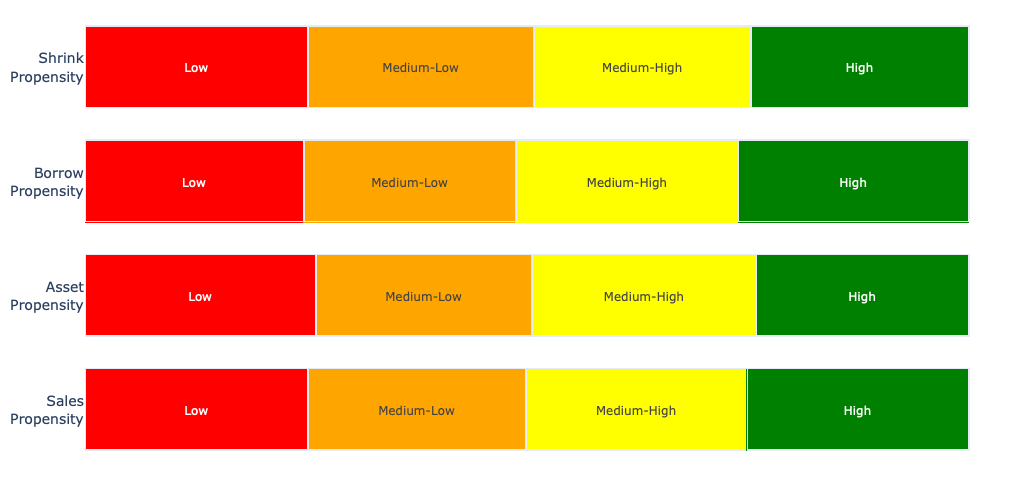

In [28]:
BucketDist_Portfolio(A, category_colors_labels, model_type_list, background_color = "white")

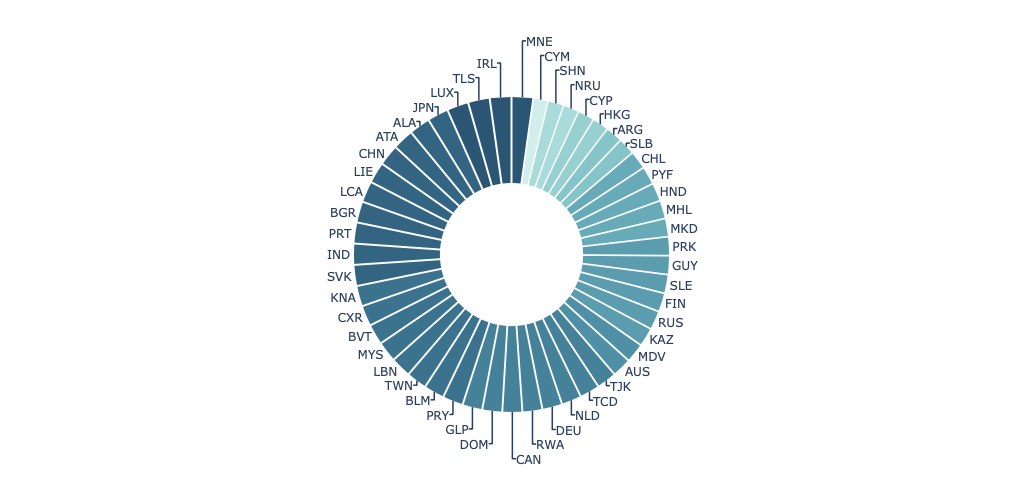

In [37]:
Donut_Plot(df)

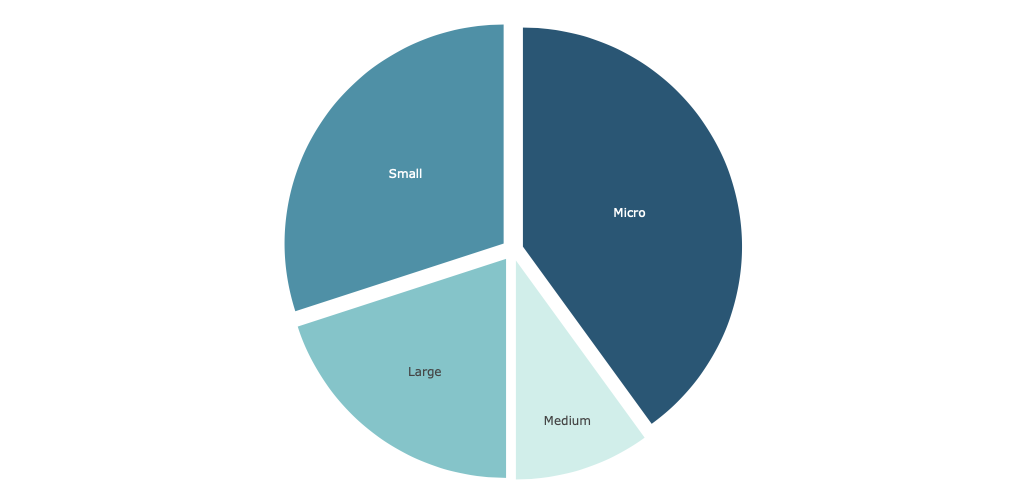

In [41]:
PieChart_Plot(df.sample(10))

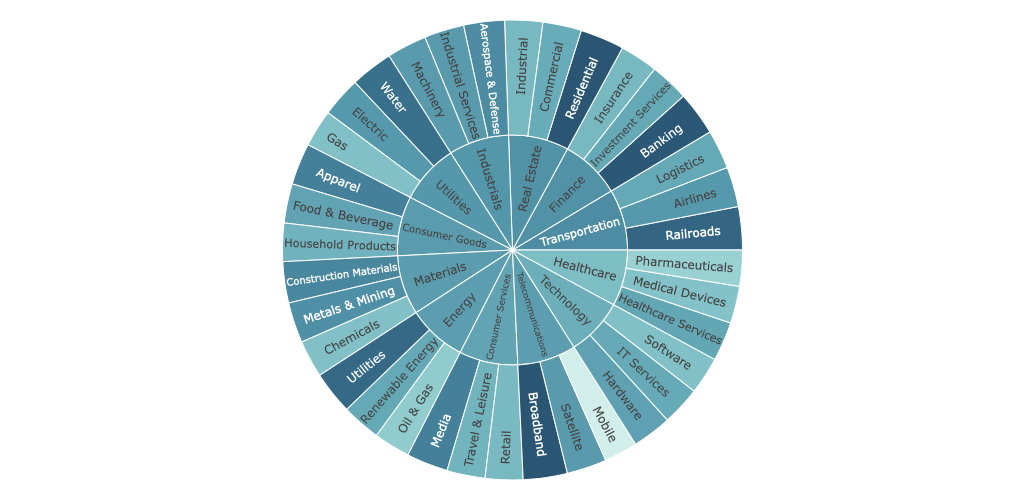

In [43]:
SunBurst_Plot(df)

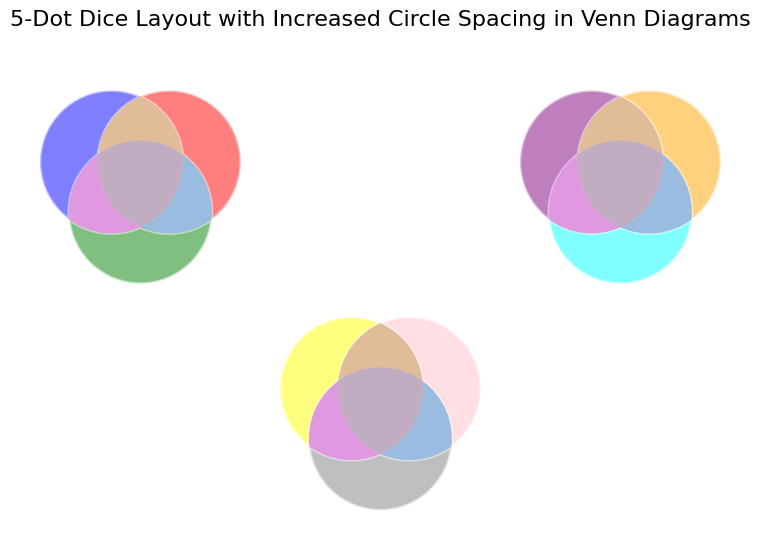

In [67]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib.gridspec import GridSpec

# Create a figure with a custom grid layout
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(3, 3, fig)

# Define subsets for each Venn diagram
subsets = (1, 1, 1, 1, 1, 1, 1)

# Function to create each Venn diagram with customized appearance and increased spacing
def create_spaced_venn(ax, color1, color2, color3):
    venn = venn3(subsets=subsets, set_labels=("Set A", "Set B", "Set C"), ax=ax)
    
    # Set colors and transparency for a clean, dice-like look
    venn.get_patch_by_id('100').set_color(color1)
    venn.get_patch_by_id('010').set_color(color2)
    venn.get_patch_by_id('001').set_color(color3)
    venn.get_patch_by_id('100').set_alpha(0.5)
    venn.get_patch_by_id('010').set_alpha(0.5)
    venn.get_patch_by_id('001').set_alpha(0.5)

    # Adjust radius for each circle to create more space between them
    for subset in ['100', '010', '001']:
        venn.get_patch_by_id(subset).set_edgecolor('white')
        venn.get_patch_by_id(subset).set_linewidth(2)
    
    # Hide labels for a cleaner look
    for text in venn.set_labels:
        text.set_visible(False)
    for text in venn.subset_labels:
        text.set_visible(False)

# Place Venn diagrams in a 5-dot dice layout, using only three positions
ax1 = fig.add_subplot(gs[0, 0])  # Top-left
ax2 = fig.add_subplot(gs[0, 2])  # Top-right
ax3 = fig.add_subplot(gs[1, 1])  # Center

# Create each Venn diagram with spacing between circles
create_spaced_venn(ax1, 'blue', 'red', 'green')
create_spaced_venn(ax2, 'purple', 'orange', 'cyan')
create_spaced_venn(ax3, 'yellow', 'pink', 'grey')

# Set an overall title, remove space between subplots, and adjust figure margins
plt.suptitle("5-Dot Dice Layout with Increased Circle Spacing in Venn Diagrams", fontsize=16)
plt.subplots_adjust(wspace=0, hspace=0, left=0.05, right=0.95, top=0.9, bottom=0.05)

# Display the plot
plt.show()


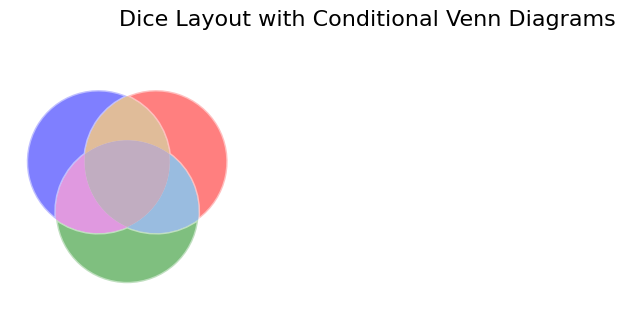

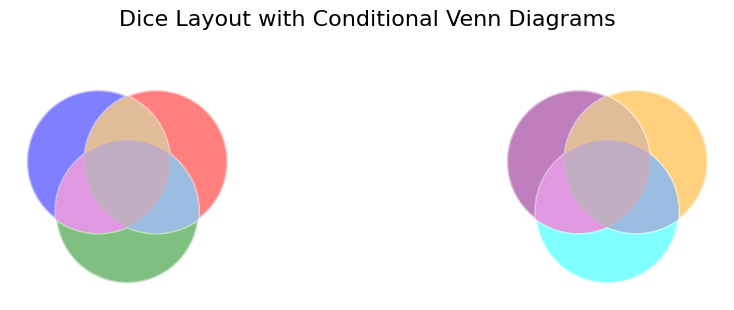

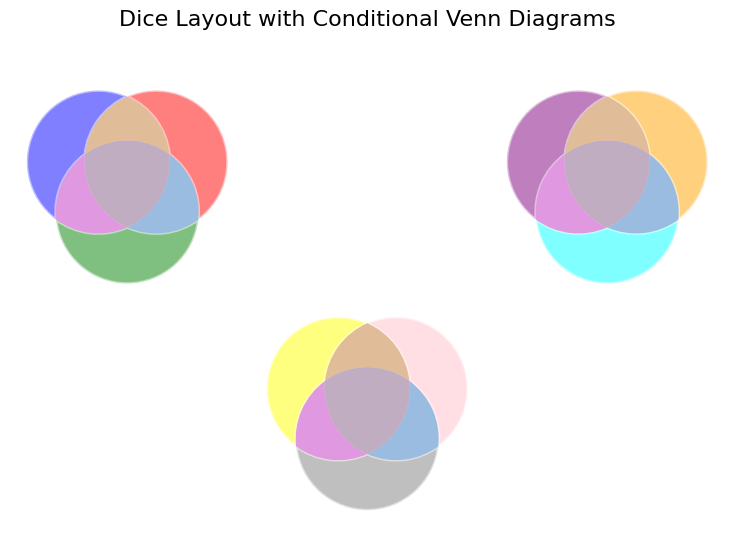

In [69]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib.gridspec import GridSpec

# Define subset sizes for the Venn diagram
subsets = (1, 1, 1, 1, 1, 1, 1)

# Function to create each Venn diagram with customized appearance and spacing
def create_spaced_venn(ax, color1, color2, color3):
    venn = venn3(subsets=subsets, set_labels=("Set A", "Set B", "Set C"), ax=ax)
    
    # Set colors and transparency for a clean look
    venn.get_patch_by_id('100').set_color(color1)
    venn.get_patch_by_id('010').set_color(color2)
    venn.get_patch_by_id('001').set_color(color3)
    venn.get_patch_by_id('100').set_alpha(0.5)
    venn.get_patch_by_id('010').set_alpha(0.5)
    venn.get_patch_by_id('001').set_alpha(0.5)

    # Add separation with a white edge
    for subset in ['100', '010', '001']:
        venn.get_patch_by_id(subset).set_edgecolor('white')
        venn.get_patch_by_id(subset).set_linewidth(2)

    # Hide outer labels for a cleaner look
    for text in venn.set_labels:
        text.set_visible(False)
    for text in venn.subset_labels:
        text.set_visible(False)

# Function to create the main layout with optional subplots
def create_dice_layout(num_venns=3):
    fig = plt.figure(figsize=(8, 8))
    gs = GridSpec(3, 3, fig)
    
    if num_venns >= 1:
        ax1 = fig.add_subplot(gs[0, 0])  # Top-left position
        create_spaced_venn(ax1, 'blue', 'red', 'green')
        
    if num_venns >= 2:
        ax2 = fig.add_subplot(gs[0, 2])  # Top-right position
        create_spaced_venn(ax2, 'purple', 'orange', 'cyan')
        
    if num_venns == 3:
        ax3 = fig.add_subplot(gs[1, 1])  # Center position
        create_spaced_venn(ax3, 'yellow', 'pink', 'grey')

    # Set an overall title and remove extra grid space for aesthetics
    plt.suptitle("Dice Layout with Conditional Venn Diagrams", fontsize=16)
    plt.subplots_adjust(wspace=0, hspace=0, left=0.05, right=0.95, top=0.9, bottom=0.05)

    # Display the plot
    plt.show()

# Example usage
create_dice_layout(num_venns=1)  # Display only one Venn diagram
create_dice_layout(num_venns=2)  # Display two Venn diagrams
create_dice_layout(num_venns=3)  # Display three Venn diagrams in full layout


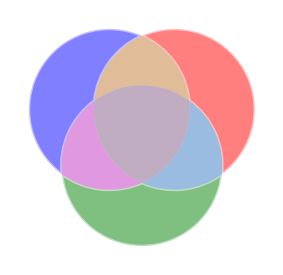

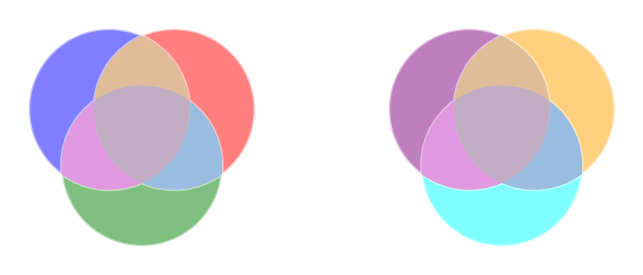

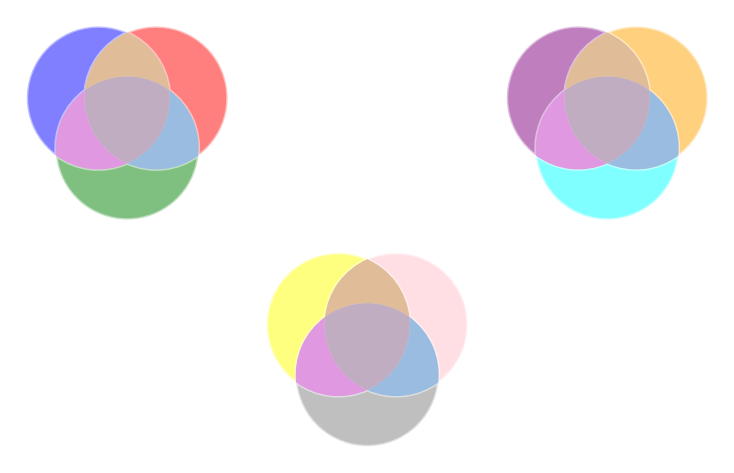

In [75]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib.gridspec import GridSpec

# Define subset sizes for the Venn diagram
subsets = (1, 1, 1, 1, 1, 1, 1)

# Function to create each Venn diagram with customized appearance and spacing
def create_spaced_venn(ax, color1, color2, color3):
    venn = venn3(subsets=subsets, set_labels=("Set A", "Set B", "Set C"), ax=ax)
    
    # Set colors and transparency for a clean look
    venn.get_patch_by_id('100').set_color(color1)
    venn.get_patch_by_id('010').set_color(color2)
    venn.get_patch_by_id('001').set_color(color3)
    venn.get_patch_by_id('100').set_alpha(0.5)
    venn.get_patch_by_id('010').set_alpha(0.5)
    venn.get_patch_by_id('001').set_alpha(0.5)

    # Add separation with a white edge
    for subset in ['100', '010', '001']:
        venn.get_patch_by_id(subset).set_edgecolor('white')
        venn.get_patch_by_id(subset).set_linewidth(2)

    # Hide outer labels for a cleaner look
    for text in venn.set_labels:
        text.set_visible(False)
    for text in venn.subset_labels:
        text.set_visible(False)

# Function to create the main layout with optional subplots
def create_dice_layout(num_venns=3):
    
    if num_venns == 1:
        fig = plt.figure(figsize=(3, 3))
        gs = GridSpec(1, 1, fig)
        ax = fig.add_subplot(gs[0, 0])  # Center position for a single Venn diagram
        create_spaced_venn(ax, 'blue', 'red', 'green')
        
    elif num_venns == 2:
        fig = plt.figure(figsize=(8, 6))
        gs = GridSpec(2, 2, fig)
        ax1 = fig.add_subplot(gs[0, 0])  # Top-left position
        create_spaced_venn(ax1, 'blue', 'red', 'green')
        
        ax2 = fig.add_subplot(gs[0, 1])  # Top-right position
        create_spaced_venn(ax2, 'purple', 'orange', 'cyan')
        
    elif num_venns == 3:
        fig = plt.figure(figsize=(8, 8))
        gs = GridSpec(3, 3, fig)
        ax1 = fig.add_subplot(gs[0, 0])  # Top-left position
        create_spaced_venn(ax1, 'blue', 'red', 'green')
        
        ax2 = fig.add_subplot(gs[0, 2])  # Top-right position
        create_spaced_venn(ax2, 'purple', 'orange', 'cyan')
        
        ax3 = fig.add_subplot(gs[1, 1])  # Center position
        create_spaced_venn(ax3, 'yellow', 'pink', 'grey')

    # Set an overall title and remove extra grid space for aesthetics
    plt.suptitle("", fontsize=16)
    plt.subplots_adjust(wspace=0, hspace=0, left=0.05, right=0.95, top=0.9, bottom=0.05)

    # Display the plot
    plt.show()

# Example usage
create_dice_layout(num_venns=1)  # Display only one Venn diagram, centered
create_dice_layout(num_venns=2)  # Display two Venn diagrams
create_dice_layout(num_venns=3)  # Display three Venn diagrams in full layout
